SVM = Support Vertor Machine = Метод опорных векторов

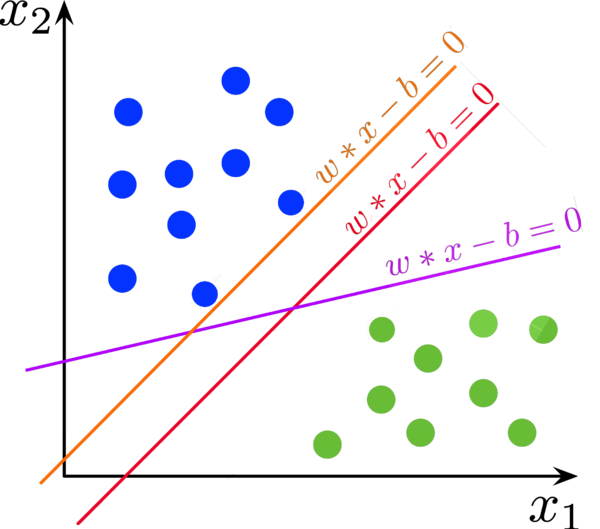!

![svm1.png](attachment:svm1.png)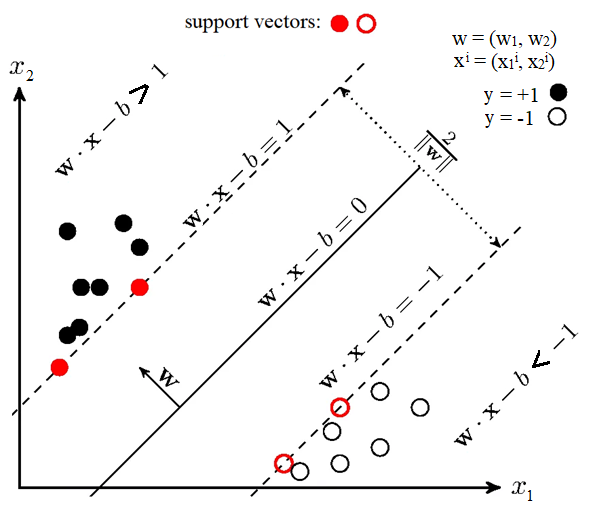

Разделяющая гиперплоскость: $w^Tx - b = 0$
    
При этом для класса "+1" $w_x - b > 0$, для класса "-1" $w^Tx - b < 0$


Ширина разделяющей полосы - проекция вектора $x_+  − x_-$ на нормаль к гиперплоскости $w$:

\begin{align} w^T(x_+  − x_-)/|w| = (w^Tx_+  − w^Tx_-)/|w| = \left((b + 1) - (b - 1)\right)/|w| = 2/|w| \rightarrow \max \end{align}

\begin{align} |w| \rightarrow \min \end{align}

\begin{align} w^Tw/2 \rightarrow \min \end{align}

Отступ $M = y(w_Tx - b)$, классификатор ошибается тогда и только тогда, когда $M<0$, объект находится на разделяющей полосе тогда и только тогда, когда $0 \le M<1$, классификатор верно классифицирует тогда и только тогда, когда $M \ge 1$

Метод опорных векторов с жестким зазором (запрещено попадание на разделяющую полосу):

\begin{aligned}  w^Tw/2 \rightarrow \min \\
y(w^Tx - b) \ge 1 \end{aligned}


Штраф за $M<0$:
\begin{aligned} Penalty = \sum_i{\max(0, 1 - M_i)} \end{aligned}

Функция потерь:
\begin{aligned} Q = \sum_i{\max(0, 1 - M_i)} + \lambda w^Tw/2 \end{aligned}

Пересчет весов:
\begin{aligned} \nabla Q &= \lambda w - yx,\space при \space yw^Tx  < 1 \\
\nabla Q &=  \lambda w,\space при \space yw^Tx \ge 1\end{aligned}


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = int(1)
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate = 0.01, lam = 0.1, max_iter = 200):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
    def predict(self, X:np.array) -> np.array:
        x_ext = add_intercept(X)
        return np.sign(self.w @ x_ext)

    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x@self.w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam*(self.w @ self.w)

    def fit(self, X, Y, verbose = False):
        X = add_intercept(X)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []

        for epoch in range(self.max_iter):
            err = 0
            loss = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.learning_rate*self.lam*self.w
                    loss += self.soft_margin_loss(X[i],Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.learning_rate*(Y[i]*X[i] - self.lam*self.w)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])
                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch,err,loss))
            errors.append(err)
            loss_epoch.append(loss)
        self.history_w = np.array(self.history_w)
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)

epoch 0. Errors=11. Mean Hinge_loss=[10.00205094]
epoch 1. Errors=10. Mean Hinge_loss=[10.00238159]
epoch 2. Errors=10. Mean Hinge_loss=[10.00237874]
epoch 3. Errors=10. Mean Hinge_loss=[10.00237588]
epoch 4. Errors=10. Mean Hinge_loss=[10.00237303]
epoch 5. Errors=10. Mean Hinge_loss=[10.00237019]
epoch 6. Errors=10. Mean Hinge_loss=[10.00236735]
epoch 7. Errors=10. Mean Hinge_loss=[10.00236451]
epoch 8. Errors=10. Mean Hinge_loss=[10.00236167]
epoch 9. Errors=10. Mean Hinge_loss=[10.00235884]
epoch 10. Errors=10. Mean Hinge_loss=[10.00235601]
epoch 11. Errors=10. Mean Hinge_loss=[10.00235318]
epoch 12. Errors=10. Mean Hinge_loss=[10.00235036]
epoch 13. Errors=10. Mean Hinge_loss=[10.00234754]
epoch 14. Errors=10. Mean Hinge_loss=[10.00234473]
epoch 15. Errors=10. Mean Hinge_loss=[10.00234192]
epoch 16. Errors=10. Mean Hinge_loss=[10.00233911]
epoch 17. Errors=10. Mean Hinge_loss=[10.0023363]
epoch 18. Errors=10. Mean Hinge_loss=[10.0023335]
epoch 19. Errors=10. Mean Hinge_loss=[10.00

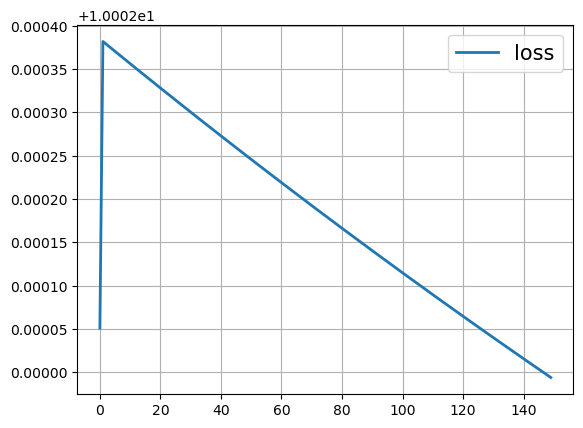

In [17]:
X = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20,1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20,1)
svm = SVMClassification(learning_rate=0.005, lam=0.006, max_iter=150)
svm.fit(X, Y, verbose = True)

print(svm.errors)
print(svm.w)

plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [18]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
Y[Y == 0] = -1
Y[Y > 0] = 1


epoch 0. Errors=88. Mean Hinge_loss=49.91513627223561
epoch 1. Errors=46. Mean Hinge_loss=19.76520903023862
epoch 2. Errors=32. Mean Hinge_loss=11.07516012473259
epoch 3. Errors=22. Mean Hinge_loss=7.091454520418352
epoch 4. Errors=15. Mean Hinge_loss=4.7935508717081845
epoch 5. Errors=14. Mean Hinge_loss=3.7964198168084717
epoch 6. Errors=12. Mean Hinge_loss=3.4657082872906493
epoch 7. Errors=10. Mean Hinge_loss=3.252343138077786
epoch 8. Errors=10. Mean Hinge_loss=3.1021788886206294
epoch 9. Errors=10. Mean Hinge_loss=2.972833299010592
epoch 10. Errors=8. Mean Hinge_loss=2.8508968695938957
epoch 11. Errors=7. Mean Hinge_loss=2.8019243480740794
epoch 12. Errors=7. Mean Hinge_loss=2.7733473282069387
epoch 13. Errors=7. Mean Hinge_loss=2.745445917182279
epoch 14. Errors=7. Mean Hinge_loss=2.718185884676678
epoch 15. Errors=6. Mean Hinge_loss=2.6395117929780763
epoch 16. Errors=7. Mean Hinge_loss=2.60917586692732
epoch 17. Errors=7. Mean Hinge_loss=2.5808946367872747
epoch 18. Errors=7. 

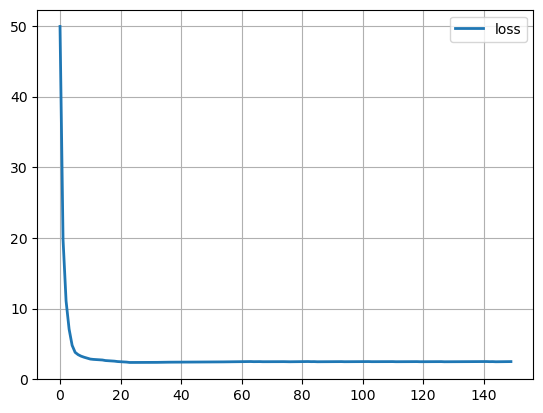

In [19]:
np.random.seed(123)
svm = SVMClassification(learning_rate = 0.005, lam = 0.006, max_iter = 150)
svm.fit(X, Y, verbose = True)
print(svm.errors)
print(svm.w)
plt.plot(svm.loss, linewidth = 2, label = 'loss')
plt.grid()
plt.legend()
plt.show()

Задача: Реализовать классификацию методом svm для набора данных  German Credit Cards UCI.csv

Нельзя обучить модель с помощью библиотечных функций.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
# Загрузка датасета
file_path = "German Credit Cards UCI.csv"
df = pd.read_csv(file_path)

# Преобразование целевой переменной в бинарный формат (1 - fully paid, -1 - charged off)
df["Loan Status"] = df["Loan Status"].map({"fully paid": 1, "charged off": -1})

In [23]:
# Выбираем числовые признаки
numerical_features = ["Loan Duration (Months)", "Loan Amount", "Age (Years)", "Number of Existing Credits at This Bank"]
X_numerical = df[numerical_features]

# One-hot encoding для категориальных признаков
categorical_features = ["Checking Account Status", "Credit History", "Purpose", "Savings Account Balance",
                         "Present Employment Time (Years)", "Job Category", "Foreign Worker Status"]
X_categorical = pd.get_dummies(df[categorical_features], drop_first=True)

# Объединяем числовые и категориальные признаки
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df["Loan Status"]

In [24]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Преобразуем DataFrame в numpy массивы и добавляем bias (столбец единиц)
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train.to_numpy()])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test.to_numpy()])

# Преобразуем y_train и y_test в numpy массивы
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Преобразуем X_train и X_test в тип float64
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Преобразуем y_train и y_test в тип float64
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [25]:
# Класс SVM на основе градиентного спуска
class SVMClassification:
    def __init__(self, learning_rate=0.01, lam=0.01, max_iter=100):
        self.max_iter = max_iter      # Количество итераций градиентного спуска
        self.learning_rate = learning_rate  # Скорость обучения
        self.lam = lam                # Коэффициент регуляризации
        self.w = None                  # Вектор весов

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)  # Инициализация весов

        for epoch in range(self.max_iter):
            for i in range(n_samples):
                margin = y[i] * np.dot(X[i], self.w)  # Вычисляем отступ M_i = y_i (w^Tx_i)

                # Обновление весов в зависимости от условия SVM
                if margin >= 1:
                    self.w -= self.learning_rate * self.lam * self.w  # Только регуляризация
                else:
                    self.w += self.learning_rate * (y[i] * X[i] - self.lam * self.w)  # Штраф за ошибку

    def predict(self, X):
        return np.sign(np.dot(X, self.w))  # Возвращаем знак предсказания (+1 или -1)

In [26]:
# Обучение модели SVM
svm = SVMClassification(learning_rate=0.003, lam=0.005, max_iter=100)
svm.fit(X_train, y_train)

# Делаем предсказания
y_pred_svm = svm.predict(X_test)


# Точность на обучающей выборке
y_pred_train = svm.predict(X_train)
accuracy_train = np.mean(y_pred_train == y_train)
print(f"Точность на обучающей выборке: {accuracy_train:.2%}")

# Оценка точности модели
accuracy_svm = np.mean(y_pred_svm == y_test)
print(f"Точность на тестовой выборке: {accuracy_svm:.2%}")

Точность на обучающей выборке: 76.82%
Точность на тестовой выборке: 75.37%


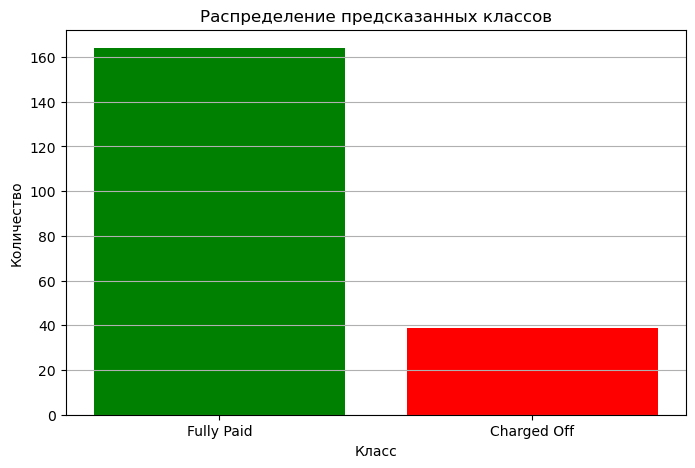

In [27]:
plt.figure(figsize=(8, 5))
plt.bar(["Fully Paid", "Charged Off"], [(y_pred_svm == 1).sum(), (y_pred_svm == -1).sum()], color=["green", "red"])
plt.title("Распределение предсказанных классов")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.grid(axis="y")
plt.show()